<a href="https://colab.research.google.com/github/bestdiya/Beginner-ML-projects/blob/main/FAKE_NEWS_DETEECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fake News detection dataset
Dataset separated in two files:

Fake.csv (23502 fake news article)
True.csv (21417 true news article)
Dataset columns:

Title: title of news article
Text: body text of news article
Subject: subject of news article
Date: publish date of news article

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# fake_data = pd.read_csv('/content/Fake.csv')
# true_data = pd.read_csv('/content/True.csv')
# fake_data = pd.read_csv('/content/Fake.csv', sep=',', error_bad_lines=False)
# true_data = pd.read_csv('/content/True.csv', sep=',', error_bad_lines=False)
# fake_data = pd.read_csv('/content/Fake.csv')
# true_data = pd.read_csv('/content/True.csv')
fake_data = pd.read_csv('/content/Fake.csv', sep=',', on_bad_lines='skip') # Replace 'error_bad_lines' with 'on_bad_lines' and set it to 'skip' to ignore bad lines.
true_data = pd.read_csv('/content/True.csv', sep=',', on_bad_lines='skip') # Replace 'error_bad_lines' with 'on_bad_lines' and set it to 'skip' to ignore bad lines.

In [16]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [17]:
fake_data.shape

(46553, 4)

In [18]:
true_data.shape

(21417, 4)

In [19]:
fake_data['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [20]:
for i in fake_data.columns:
  print(i)

title
text
subject
date


In [21]:
print(fake_data['subject'].unique())

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [22]:
for i in fake_data.columns:
  print(i)
  print(fake_data[i])

title
0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
46548    McPain: John McCain Furious That Iran Treated ...
46549    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
46550    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
46551    How to Blow $700 Million: Al Jazeera America F...
46552    10 U.S. Navy Sailors Held by Iranian Military ...
Name: title, Length: 46553, dtype: object
text
0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
   

In [23]:
# fake_data['title']
pd.set_option("display.max_colwidth", None)
fake_data['title']
#

,title
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech
...,...
46548,McPain: John McCain Furious That Iran Treated US Sailors Well
46549,"JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users"
46550,Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria
46551,How to Blow $700 Million: Al Jazeera America Finally Calls it Quits


Explanation of Changes:

pd.set_option("display.max_colwidth", None): This line is the key to solving the truncation issue.

pd.set_option: This is a function in Pandas used to customize display settings.
"display.max_colwidth": This specific option controls the maximum width allowed for a column when displaying DataFrames or Series.
None: By setting this option to None, you're essentially telling Pandas to not impose any width restrictions on the columns. This will ensure that the full content of your titles is displayed, even if they are long.

In [24]:
# Add labels: 1 for fake news, 0 for real news
fake_data['label'] = 1
true_data['label'] = 0


In [25]:
# Combine the datasets
combined_df = pd.concat([fake_data, true_data], ignore_index=True)


In [26]:
# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [27]:
# Save the combined dataset to a new CSV file
combined_df.to_csv('combined_news_dataset.csv', index=False)

In [28]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import re
import string

In [29]:
# Step 2: Load Dataset
df = pd.read_csv('/content/combined_news_dataset.csv')  # adjust path if needed
df = df[['text', 'label']].dropna()

In [30]:
# Step 3: Text Preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['text'] = df['text'].apply(clean_text)

In [31]:
# Step 4: Feature Extraction
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])
y = df['label']

In [32]:
combined_df

title  \
0                                                       Trump Muslim comments do not tarnish view of U.S. freedoms abroad: ambassador   
1      WOW! TOMI LAHREN BLASTS Liberal Media For Trying To Label Conservative News As “Fake”…”Evolve Or DIE Mainstream Media” [VIDEO]   
2                                                                             Advisers Are Now Warning Donald Trump About Impeachment   
3                                                                                Brazil's Temer to leave hospital, return to Brasilia   
4                                     OBAMA HID BIN LADEN PAPERS To Bury This Damning Evidence That Could Have Cost Him 2012 Election   
...                                                                                                                               ...   
67965                                              WOW! IS SEAN HANNITY’S Job With FOX News In Jeopardy Over Seth Rich Investigation?   
67966                                      Obama Finally Takes Action: Kicks 35 Russian Diplomats Out Of U.S. Over Election Tampering   
67967                                                   Democrats seek FBI probe of allegations Russia seeking to influence U.S. vote   
67968                                              Trump’s Involvement In Houston Chemical Plant Explosion Will Set Your Hair On Fire   
67969                                       Conservative Christians Think Girls Are A Crop, Should Be Married Off As Children (IMAGE)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [33]:
df

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        washington reuters  donald trump’s call for a temporary ban on muslims entering the united states does not tarnish the us commitment to religious freedom in the eyes of foreigners a state department official said on wednesday on dec  the week after a muslim couple killed  people in san bernardino the republican called for “a total and complete shutdown of muslims entering the united states until our country’s representatives can figure out what is going on” s

In [34]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Step 6: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Step 7: Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9899955862880683

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4247
           1       0.99      0.99      0.99      9347

    accuracy                           0.99     13594
   macro avg       0.99      0.99      0.99     13594
weighted avg       0.99      0.99      0.99     13594



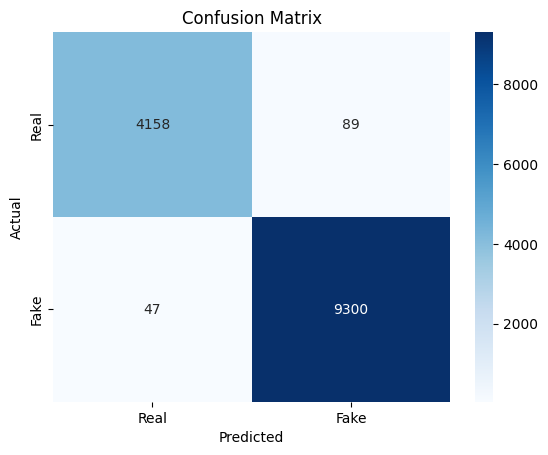

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# List of models to train and evaluate
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', C=1)
}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- Training KNN ---
[[1078 3169]
 [  37 9310]]
              precision    recall  f1-score   support

           0       0.97      0.25      0.40      4247
           1       0.75      1.00      0.85      9347

    accuracy                           0.76     13594
   macro avg       0.86      0.62      0.63     13594
weighted avg       0.82      0.76      0.71     13594


--- Training Logistic Regression ---
[[4158   89]
 [  47 9300]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4247
           1       0.99      0.99      0.99      9347

    accuracy                           0.99     13594
   macro avg       0.99      0.99      0.99     13594
weighted avg       0.99      0.99      0.99     13594


--- Training Decision Tree ---
[[4231   16]
 [  45 9302]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      1.00      1.00      9347

    accur

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix